In [126]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('The modules has been loaded')

The modules has been loaded


In [2]:
# import the file
transaction_data_copy = pd.read_excel('QVI_transaction_data.xlsx')
transaction_data_copy.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
# Make a copy of the file
transaction_data = transaction_data_copy.copy()
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# Check information of the dataframe
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
# Date should be in a date format, not INT
# Store number should be in a string format, not INT
# https://stackoverflow.com/questions/48494376/pd-to-datetime-changes-the-values-to-1970-which-are-not-the-correct-dates
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], errors='coerce', origin='1899-12-30', unit='D')
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [6]:
# Change the store number into a string format
transaction_data['STORE_NBR'] = transaction_data['STORE_NBR'].astype(str)
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  object        
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 16.2+ MB


In [7]:
# check for possible outliers in the dates, get the min and max
print(f"Min: {transaction_data['DATE'].min()}, Max: {transaction_data['DATE'].max()}")

Min: 2018-07-01 00:00:00, Max: 2019-06-30 00:00:00


In [8]:
# Check the top 10 highest and lowest 10 products according to profitability
# Highest 10 profit and lowest 10
high_prof = transaction_data.sort_values('TOT_SALES', ascending=False)
high_prof
# Delete the 200 as the next ones are 5 and below. 
# Lowest is 1, no negative numbers, values are ok. 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
...,...,...,...,...,...,...,...,...
259695,2018-11-13,41,41089,38002,76,Woolworths Medium Salsa 300g,1,1.5
259707,2018-10-18,41,41267,38201,76,Woolworths Medium Salsa 300g,1,1.5
197005,2018-08-11,167,167121,168928,76,Woolworths Medium Salsa 300g,1,1.5
216449,2019-03-01,264,264032,262778,76,Woolworths Medium Salsa 300g,1,1.5


In [9]:
transaction_data.loc[transaction_data['STORE_NBR'] == '226'].sort_values(['PROD_QTY'])
# 200 is an outlier. Value is based on two time transactions only. 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
169,2019-05-15,226,226133,226926,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,1,4.6
172209,2018-08-18,226,226346,228074,109,Pringles Barbeque 134g,1,3.7
172210,2018-08-17,226,226357,228136,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8
117932,2018-08-18,226,226014,226283,51,Doritos Mexicana 170g,1,4.4
117934,2018-08-16,226,226127,226887,60,Kettle Tortilla ChpsFeta&Garlic 150g,1,4.6
...,...,...,...,...,...,...,...,...
217278,2018-08-19,226,226378,228250,81,Pringles Original Crisps 134g,5,18.5
117935,2019-05-14,226,226193,227260,40,Thins Chips Seasonedchicken 175g,5,16.5
32759,2018-08-16,226,226251,227562,15,Twisties Cheese 270g,5,23.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [10]:
transaction_data = transaction_data.drop(transaction_data[transaction_data["PROD_QTY"] > 5].index)
transaction_data.sort_values('TOT_SALES', ascending=False)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
55558,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
5179,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
117850,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
150683,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
184969,2019-05-20,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
...,...,...,...,...,...,...,...,...
1387,2019-04-28,74,74321,73172,76,Woolworths Medium Salsa 300g,1,1.5
262219,2018-11-22,163,163198,163489,35,Woolworths Mild Salsa 300g,1,1.5
55725,2019-01-09,2,2361,959,76,Woolworths Medium Salsa 300g,1,1.5
194299,2019-05-24,124,124335,128076,76,Woolworths Medium Salsa 300g,1,1.5


In [11]:
transaction_data.describe()

,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [12]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264834 non-null  datetime64[ns]
 1   STORE_NBR       264834 non-null  object        
 2   LYLTY_CARD_NBR  264834 non-null  int64         
 3   TXN_ID          264834 non-null  int64         
 4   PROD_NBR        264834 non-null  int64         
 5   PROD_NAME       264834 non-null  object        
 6   PROD_QTY        264834 non-null  int64         
 7   TOT_SALES       264834 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 18.2+ MB


In [13]:
# Check transaction data by date
# Why only 364 rows?
transaction_data.groupby(['DATE'])[["PROD_QTY", "TOT_SALES"]].sum()

,PROD_QTY,TOT_SALES
DATE,,
2018-07-01,1394,5372.2
2018-07-02,1367,5315.4
2018-07-03,1389,5321.8
2018-07-04,1373,5309.9
2018-07-05,1358,5080.9
...,...,...
2019-06-26,1380,5305.0
2019-06-27,1352,5202.8
2019-06-28,1400,5299.6


<Axes: xlabel='DATE'>

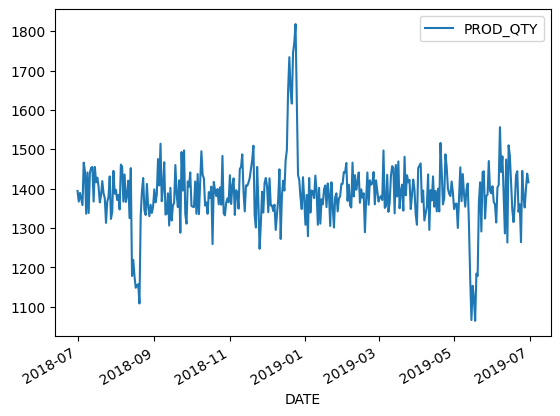

In [14]:
transaction_data.groupby(['DATE'])[["PROD_QTY"]].sum().plot()

In [15]:
# Find the missing day
# https://www.tutorialspoint.com/python-how-to-check-missing-dates-in-pandas
date_index = transaction_data.set_index('DATE')
k = pd.date_range(start='2018-07-01', end='2019-06-30').difference(date_index.index)
print('There are no transactions on: ', k)
# Christmas day

There are no transactions on:  DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


In [16]:
# Delete all unrelated products (salsa)
transaction_data[~transaction_data["PROD_NAME"].str.contains("Salsa | salsa") == True]
# from 264,834 to 246,740

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [17]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


PRODUCT SIZES

In [18]:
# Extract product sizes
transaction_data['PROD_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)') + 'g'
transaction_data['PROD_SIZE']

0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: PROD_SIZE, Length: 264834, dtype: object

In [19]:
transaction_data.groupby(['PROD_SIZE'])[["PROD_QTY"]].sum()

,PROD_QTY
PROD_SIZE,
110g,42835
125g,2730
134g,48019
135g,6212
150g,82174
160g,5604
165g,29051
170g,38088
175g,126467


<Axes: >

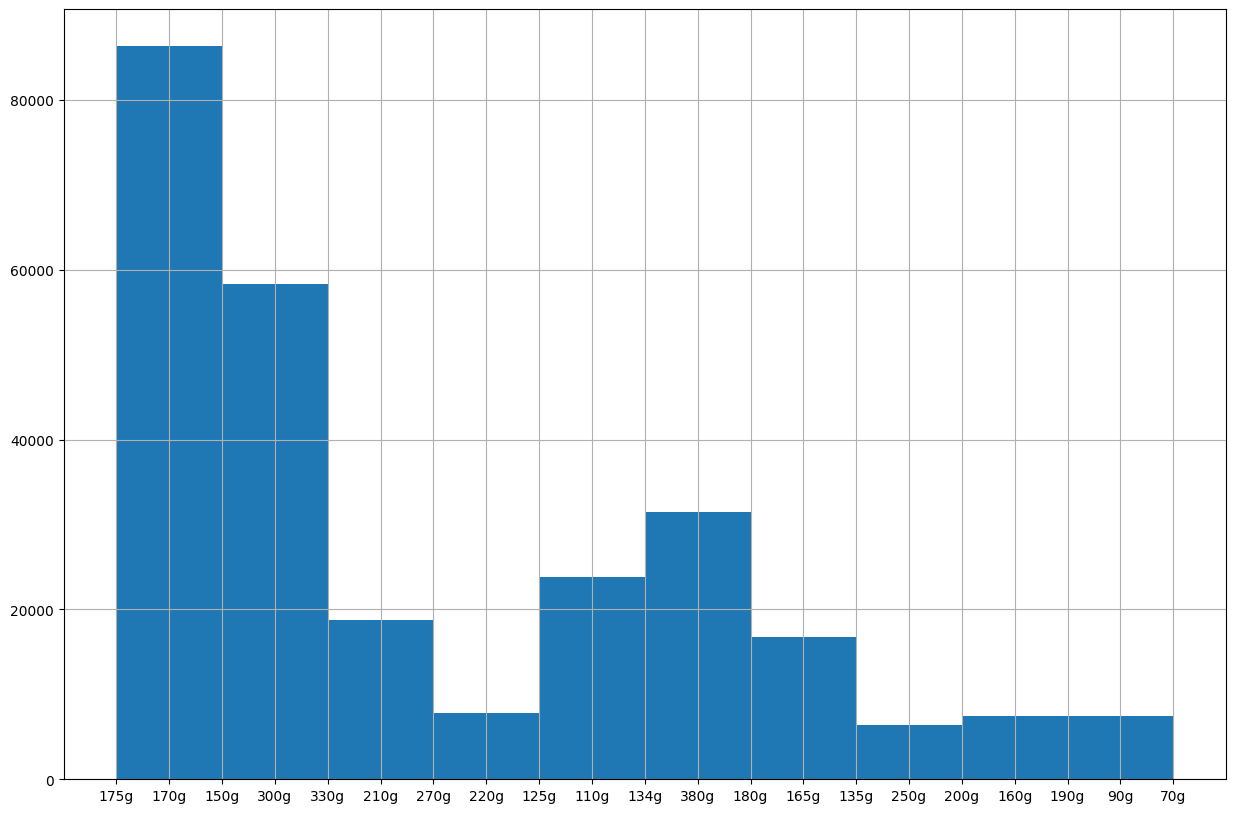

In [20]:
# Create histogram of the pack sizes
transaction_data['PROD_SIZE'].hist(figsize=(15, 10))

BRANDS

In [21]:
transaction_data['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264834, dtype: object

In [22]:
transaction_data['BRAND_NAME'] = transaction_data['PROD_NAME'].str.split(' ').str[0].str.upper()
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,KETTLE
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,KETTLE
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,TOSTITOS
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,DORITOS
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,DORITOS


In [23]:
transaction_data.groupby(['BRAND_NAME'])[["PROD_QTY"]].sum()

,PROD_QTY
BRAND_NAME,
BURGER,2970
CCS,8609
CHEETOS,5530
CHEEZELS,8747
COBS,18571
DORITO,6109
DORITOS,47707
FRENCH,2643
GRAIN,11962


In [24]:
# Correct some of the brand names
# RED = RRD
# SNBTS = SUNBITES
# INFZNS = INFUZIONS
# WW = WOOLWORTHS
# SMITH = SMITHS
# NCC = NATURAL
# DORITO = DORITOS
# GRAIN = GRNWVES
transaction_data['BRAND_NAME'].replace('RED', 'RRD', inplace=True)
transaction_data['BRAND_NAME'].replace('SNBTS', 'SUNBITES', inplace=True)
transaction_data['BRAND_NAME'].replace('INFZNS', 'INFUZIONS', inplace=True)
transaction_data['BRAND_NAME'].replace('WW', 'WOOLWORTHS', inplace=True)
transaction_data['BRAND_NAME'].replace('SMITH', 'SMITHS', inplace=True)
transaction_data['BRAND_NAME'].replace('NCC', 'NATURAL', inplace=True)
transaction_data['BRAND_NAME'].replace('DORITO', 'DORITOS', inplace=True)
transaction_data['BRAND_NAME'].replace('GRAIN', 'GRNWVES', inplace=True)
transaction_data.groupby(['BRAND_NAME'])[["PROD_QTY"]].sum()

,PROD_QTY
BRAND_NAME,
BURGER,2970
CCS,8609
CHEETOS,5530
CHEEZELS,8747
COBS,18571
DORITOS,53816
FRENCH,2643
GRNWVES,14726
INFUZIONS,27119


DATA CLEANING & SOME ANALYTICS ON transaction_behaviors are done, proceeding to customer data.

In [25]:
purchase_behavior_copy = pd.read_csv('QVI_purchase_behaviour.csv')
purchase_behavior = purchase_behavior_copy.copy()
purchase_behavior

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [26]:
purchase_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
# Check count of members per lifestage
purchase_behavior.groupby(['LIFESTAGE'])[["LYLTY_CARD_NBR"]].count()

,LYLTY_CARD_NBR
LIFESTAGE,
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549
OLDER FAMILIES,9780
OLDER SINGLES/COUPLES,14609
RETIREES,14805
YOUNG FAMILIES,9178
YOUNG SINGLES/COUPLES,14441


In [119]:
# check number of members per service type
service_type = purchase_behavior.groupby(['PREMIUM_CUSTOMER'])[["LYLTY_CARD_NBR"]].count()
service_type

,LYLTY_CARD_NBR
PREMIUM_CUSTOMER,
Budget,24470
Mainstream,29245
Premium,18922


In [29]:
# left join the two tables through loyalty card number
customer_data = transaction_data.merge(purchase_behavior, on='LYLTY_CARD_NBR', how='left')
customer_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,KETTLE,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,KETTLE,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,TOSTITOS,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,DORITOS,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,DORITOS,YOUNG SINGLES/COUPLES,Premium


In [30]:
# Check for null in case some has not been joined
# https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe
np.where(pd.isnull(customer_data))

(array([], dtype=int64), array([], dtype=int64))

In [31]:
# Check for empty strings
np.where(customer_data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [32]:
# Export new data frame as an excel
customer_data.to_excel('customer_transaction_behavior.xlsx')
print('File has been transported to excel')

File has been transported to excel


<hr>


DATA ANALYSIS ON CUSTOMER SEGMENTS

Metrics: 
- Product Quantity and Total Sales by Service Type and Lifestage
- 

Analysis on lifestages

In [113]:
# Lifestages spending habits
lifestage_spent = customer_data.groupby(['LIFESTAGE'])[['TOT_SALES']].sum().sort_values(by="TOT_SALES", ascending=False).style.format("{:,.0f}")
lifestage_spent

,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,"402,427"
RETIREES,"366,471"
OLDER FAMILIES,"352,467"
YOUNG FAMILIES,"316,160"
YOUNG SINGLES/COUPLES,"260,405"
MIDAGE SINGLES/COUPLES,"184,751"
NEW FAMILIES,"50,433"


C:\Program Files\Sublime Text\sublime_text.exe\ipykernel_6556\3219922933.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lifestage_pie = customer_data.groupby(['LIFESTAGE']).sum().plot(kind='pie', y="TOT_SALES", legend=False)


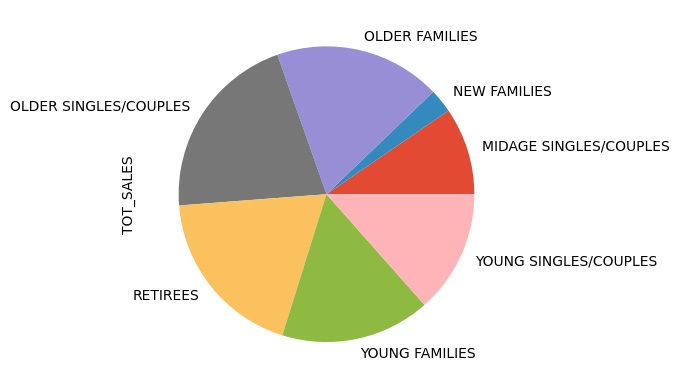

In [146]:
lifestage_pie = customer_data.groupby(['LIFESTAGE']).sum().plot(kind='pie', y="TOT_SALES", legend=False)
plt.savefig('lifestage_pie.jpg')

In [150]:
# brand
brand = customer_data.groupby(['BRAND_NAME'])[['TOT_SALES']].sum().sort_values(by="TOT_SALES", ascending=False).style.format("{:,.0f}")
brand

,TOT_SALES
BRAND_NAME,
KETTLE,"390,240"
DORITOS,"240,591"
SMITHS,"224,660"
PRINGLES,"177,656"
INFUZIONS,"99,048"
RRD,"95,046"
OLD,"90,785"
THINS,"88,852"
TWISTIES,"81,522"


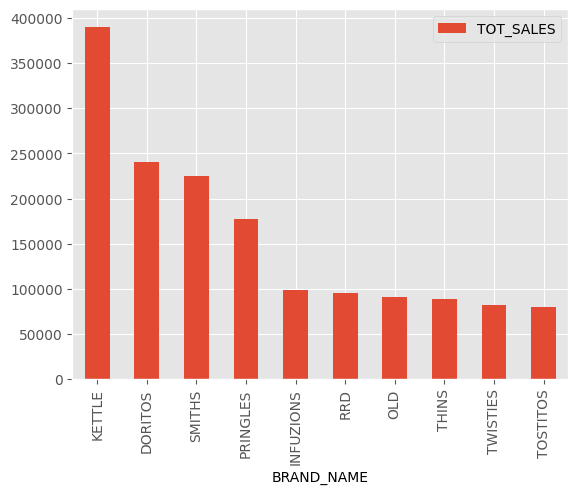

In [175]:
customer_data.groupby(['BRAND_NAME'])[['TOT_SALES']].sum().sort_values(by="TOT_SALES", ascending=False).head(10).plot.bar(rot=90)
plt.savefig('best_selling_brands.jpg')

In [117]:
# Product Size
# brand
prod_size = customer_data.groupby(['PROD_SIZE'])[['TOT_SALES']].sum().sort_values(by="TOT_SALES", ascending=False).style.format("{:,.0f}")
prod_size

,TOT_SALES
PROD_SIZE,
175g,"485,437"
150g,"304,288"
134g,"177,656"
110g,"162,765"
170g,"146,673"
330g,"136,794"
300g,"113,331"
165g,"101,361"
380g,"75,420"


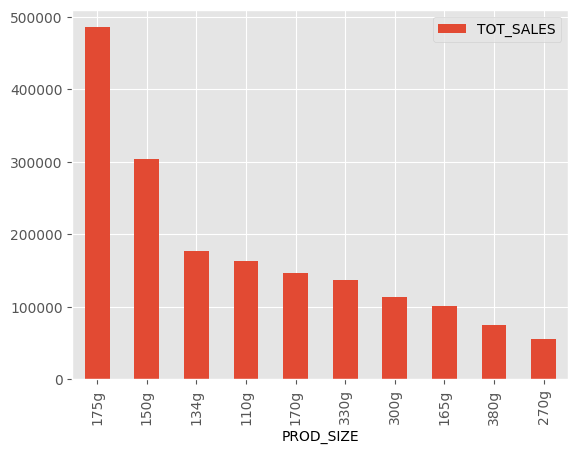

In [176]:
customer_data.groupby(['PROD_SIZE'])[['TOT_SALES']].sum().sort_values(by="TOT_SALES", ascending=False).head(10).plot.bar(rot=90)
plt.savefig('pack_size.jpg')

In [114]:
# Segregation of data on LIFESTAGE and PREMIUM_CUSTOMER
lifestage_premium_customer = customer_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])[['PROD_QTY', 'TOT_SALES']].sum().sort_values(by="TOT_SALES", ascending=False).style.format("{:,.0f}")
lifestage_premium_customer

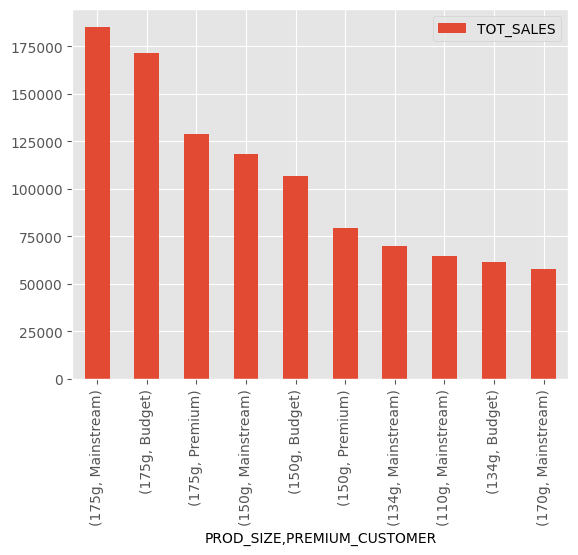

In [177]:
customer_data.groupby(['PROD_SIZE', 'PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().sort_values(by="TOT_SALES", ascending=False).head(10).plot.bar(rot=90)
plt.savefig('prod_and_size.jpg')

In [111]:
# Per brand
per_brand = customer_data.groupby(['BRAND_NAME', 'PROD_SIZE'])[['PROD_QTY', 'TOT_SALES']].sum().sort_values(by="TOT_SALES", ascending=False).style.format("{:,.0f}")
per_brand

,,PROD_QTY,TOT_SALES
BRAND_NAME,PROD_SIZE,,
KETTLE,175g,"36,425","196,668"
PRINGLES,134g,"48,019","177,656"
KETTLE,150g,"36,414","167,481"
DORITOS,170g,"24,153","106,264"
INFUZIONS,110g,"24,264","92,196"
OLD,300g,"17,805","90,785"
THINS,175g,"26,929","88,852"
TOSTITOS,175g,"18,134","79,790"
COBS,110g,"18,571","70,570"


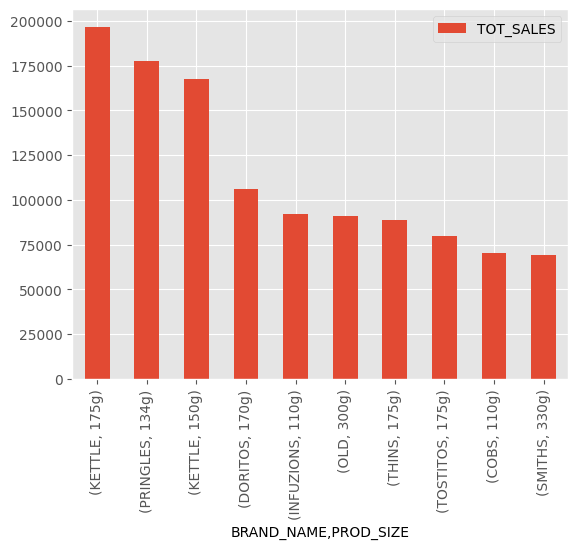

In [178]:
customer_data.groupby(['BRAND_NAME', 'PROD_SIZE'])[['TOT_SALES']].sum().sort_values(by="TOT_SALES", ascending=False).head(10).plot.bar(rot=90)
plt.savefig('brand_size.jpg')

In [174]:
brand_lifestage = customer_data.groupby(['LIFESTAGE', 'BRAND_NAME', 'PROD_SIZE'])[['PROD_QTY', 'TOT_SALES']].sum().sort_values(by="TOT_SALES", ascending=False).style.format("{:,.0f}")
brand_lifestage

### Conclusions

The age group that brings in the most income are those who are in the group of older singles/couples followed by the retirees. 

The top five most profitable brands are kettle, doritos, smiths, pringles, and infuzions. 
The top five most profitable product sizes are 175g, 150g, 134g, 110g, and 170g. 

Kettle seems to be the most popular product, especially the 175g pack that is most popular among the older singles/couples and retirees. 
Kettle is followed by pringles, and Doritos. It is best to maintain stocks of these products on all stores. 

We should also gauge products that are on the least bought by customers, most especially the cheetos, sunbites, french, and burger. We should always check if stocks are being bought on time before their expirations dates and/or if the amount of time that they have been sitting in the store is disadvantageous. It is best to observe and just put the right amount of stock for the product.  